In [1]:
#ML model for predicting the sales price for a home in Ames, Iowa. 

#import tools needed

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn

%cd /Users/glenharris/Documents

/Users/glenharris/Documents


In [2]:
#upload three csv files that were previously split.

train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
target_row = pd.read_csv('sample_submission.csv')

In [3]:
#I want to split the data and have a higher amount for the training set. I would prefer 80/20 split rather than 50/50. 
#Combine the tests set feature and target. 

combined_test = pd.merge(test, target_row, on='Id')

#Change SalePrice to integer. 

combined_test['SalePrice'] = combined_test['SalePrice'].astype(int)

#combine both data sets. 

sales_df_combined = pd.concat([train, combined_test], ignore_index=True)



In [4]:
#Dropping Id column since it is not needed. 

sales_df = sales_df_combined.drop(columns='Id', axis=1)


In [5]:
#review original dataframe, look at data types and null values without diving further into the data

sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     2919 non-null   int64  
 1   MSZoning       2915 non-null   object 
 2   LotFrontage    2433 non-null   float64
 3   LotArea        2919 non-null   int64  
 4   Street         2919 non-null   object 
 5   Alley          198 non-null    object 
 6   LotShape       2919 non-null   object 
 7   LandContour    2919 non-null   object 
 8   Utilities      2917 non-null   object 
 9   LotConfig      2919 non-null   object 
 10  LandSlope      2919 non-null   object 
 11  Neighborhood   2919 non-null   object 
 12  Condition1     2919 non-null   object 
 13  Condition2     2919 non-null   object 
 14  BldgType       2919 non-null   object 
 15  HouseStyle     2919 non-null   object 
 16  OverallQual    2919 non-null   int64  
 17  OverallCond    2919 non-null   int64  
 18  YearBuil

In [6]:
# After a quick review I decided to drop columns that are missing large amount of data that exceeds over 50% of null values.
# I do not want to imput majority of data in a feature, the remaining nulls will be imputed later 

dropped_col = ['Alley', 'MasVnrType', 'MasVnrArea', 'PoolQC', 'Fence', 'MiscFeature', 'MiscVal', 'FireplaceQu']

sales_df_reduced = sales_df.drop(columns=dropped_col, axis=1)

In [7]:
#Split the dataframe into a feature and target dataframe 

sales_features = sales_df_reduced.drop(['SalePrice'], axis=1)

sales_target = sales_df_reduced['SalePrice'].copy()

In [8]:
#split into training and test sets before reviewing the data to prevent data leakage

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(sales_features, sales_target, test_size=.2, random_state=42)

In [9]:
#review the descriptive statistics of the numeric values

sales_df_reduced.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MoSold,YrSold,SalePrice
count,2919.000000,2433.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2918.000000,2918.000000,2918.000000,...,2918.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000
mean,57.137718,69.305795,10168.114080,6.089072,5.564577,1971.312778,1984.264474,441.423235,49.582248,560.772104,...,472.874572,93.709832,47.486811,23.098321,2.602261,16.062350,2.251799,6.213087,2007.792737,180052.602261
std,42.517628,23.344905,7886.996359,1.409947,1.113131,30.291442,20.894344,455.610826,169.205611,439.543659,...,215.394815,126.526589,67.575493,64.244246,25.188169,56.184365,35.663946,2.714762,1.314964,57381.570984
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7478.000000,5.000000,5.000000,1953.500000,1965.000000,0.000000,0.000000,220.000000,...,320.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,154794.500000
50%,50.000000,68.000000,9453.000000,6.000000,5.000000,1973.000000,1993.000000,368.500000,0.000000,467.000000,...,480.000000,0.000000,26.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,176734.000000
75%,70.000000,80.000000,11570.000000,7.000000,6.000000,2001.000000,2004.000000,733.000000,0.000000,805.500000,...,576.000000,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,191895.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,5644.000000,1526.000000,2336.000000,...,1488.000000,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,12.000000,2010.000000,755000.000000


In [10]:
#create dataframes separating our numerical and categorical data for general review. 

raw_num_col = sales_df_reduced.select_dtypes(include=['number'])
raw_cat_col = sales_df_reduced.select_dtypes(include=['object'])

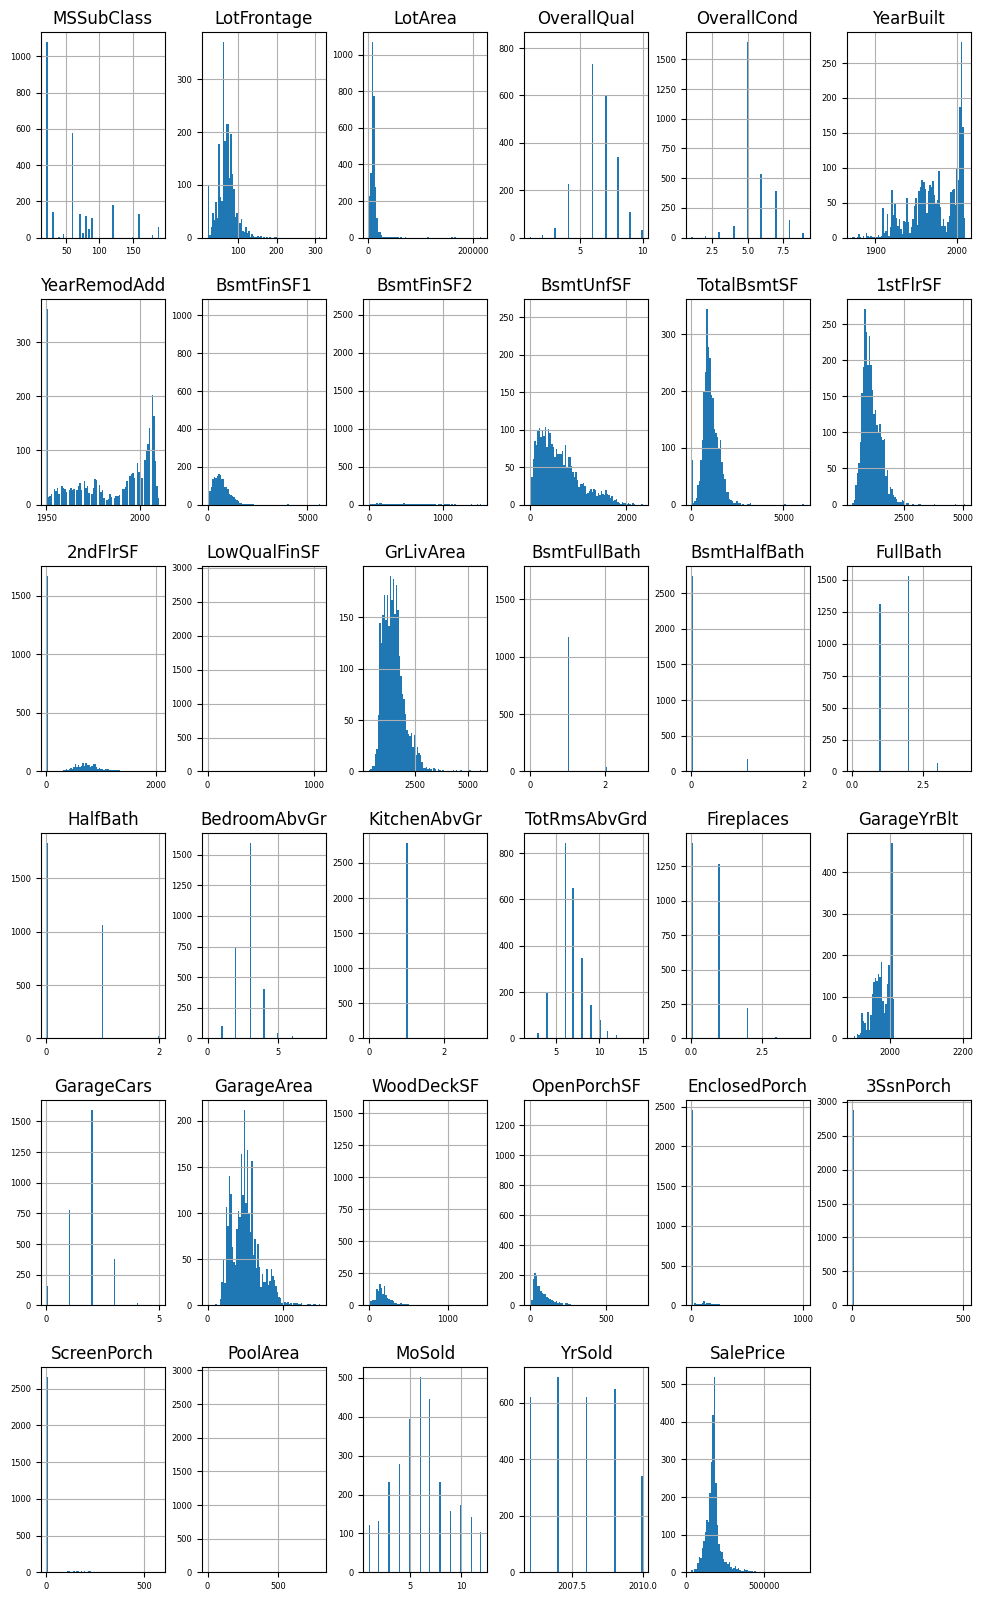

In [11]:
#Create plot showing target market distribution

raw_num_col.hist(figsize=(12,20), bins=75, xlabelsize=6, ylabelsize=6)
plt.show()

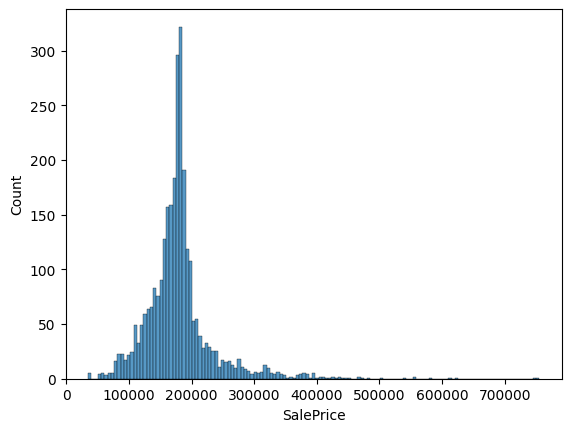

In [12]:
# Review target distribution 

sns.histplot(sales_df_reduced['SalePrice'])
plt.show()

In [13]:
#Review the correlations of each feature to the target

corr_matrix = raw_num_col.corr()
corr_matrix['SalePrice'].sort_values(ascending=False)

SalePrice        1.000000
GrLivArea        0.588010
OverallQual      0.550911
TotRmsAbvGrd     0.469800
GarageCars       0.469249
GarageArea       0.464809
1stFlrSF         0.462865
TotalBsmtSF      0.453224
FullBath         0.433710
YearBuilt        0.362066
Fireplaces       0.353567
YearRemodAdd     0.350032
GarageYrBlt      0.325297
LotFrontage      0.318084
LotArea          0.296497
BsmtFinSF1       0.272202
2ndFlrSF         0.272140
WoodDeckSF       0.238381
OpenPorchSF      0.236376
BedroomAbvGr     0.229611
HalfBath         0.228837
BsmtUnfSF        0.175195
BsmtFullBath     0.148210
ScreenPorch      0.082308
PoolArea         0.081039
MoSold           0.067222
3SsnPorch        0.029979
BsmtFinSF2      -0.007437
BsmtHalfBath    -0.012623
LowQualFinSF    -0.015395
YrSold          -0.039064
OverallCond     -0.065785
EnclosedPorch   -0.070698
KitchenAbvGr    -0.071760
MSSubClass      -0.087910
Name: SalePrice, dtype: float64

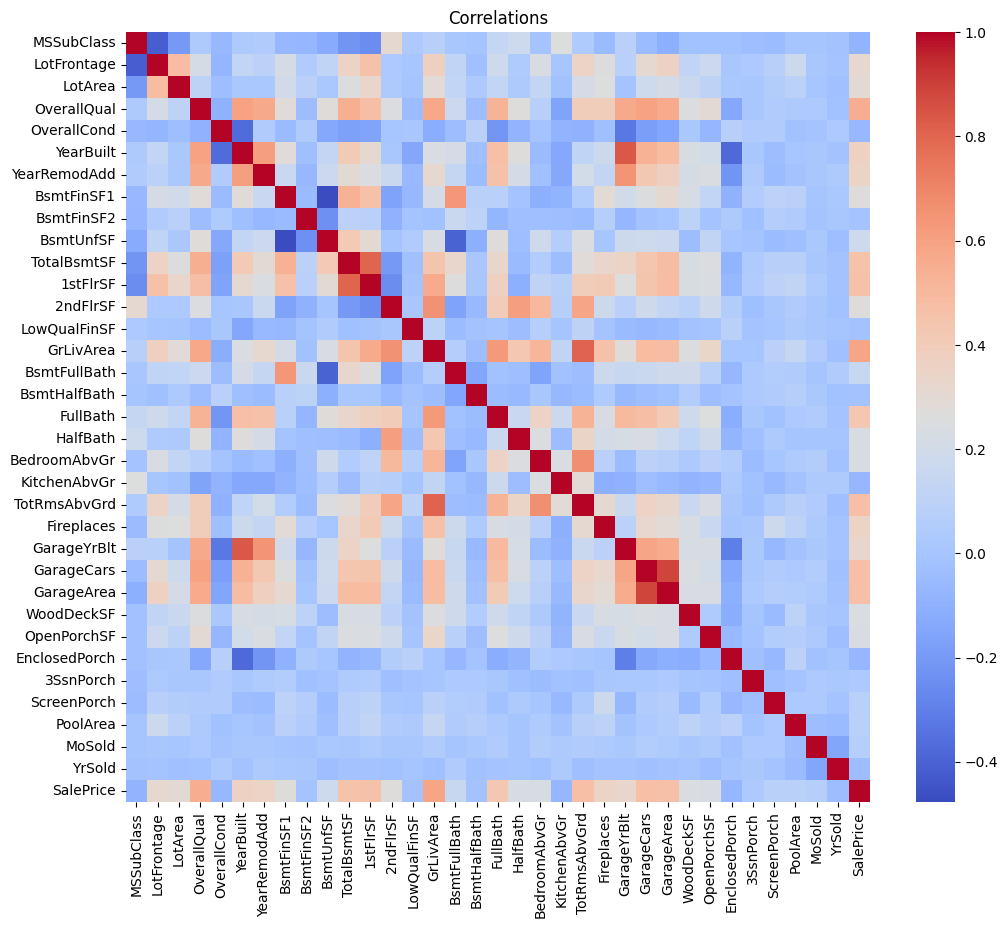

In [14]:
#Create correlation matrix visual 

plt.figure(figsize=(12,10))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm')
plt.title('Correlations')
plt.show()

In [15]:
#Separate the columns by data types for pipelines (numeric, categorical (non-ordinal), ordinal)

#numeric data 

num_col = list(x_train.select_dtypes(include=['number']))

In [16]:
#Ordinal data

ord_col = list(x_train[['ExterQual', 'ExterCond','BsmtQual','BsmtCond', 'BsmtExposure', 'BsmtFinType1',
               'BsmtFinType2', 'HeatingQC', 'KitchenQual', 'Functional',  'GarageQual', 'GarageCond']])


In [17]:
#categorical data without ordinal columns 

cat_col = list(x_train.select_dtypes(include='object').drop(columns=ord_col, axis=1))

In [18]:
# Create pipelines for each type of variable 

from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

#numeric pipeline, using median to impute, transforming it back since the output is an array, scaling the numeric data for ML

numeric_pipeline = make_pipeline(
    SimpleImputer(strategy='median').set_output(transform='pandas'),
    StandardScaler()  
)

In [19]:
#categorical pipeline, imputing values as most frequent values, onehot encoding 

from sklearn.preprocessing import OneHotEncoder

categorical_pipeline = make_pipeline(
    SimpleImputer(strategy='most_frequent'),
    OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False)
)

In [20]:
#ordinal pipeline, imputing most frequent value, ordinal encoding 

from sklearn.preprocessing import OrdinalEncoder

ordinal_pipeline = make_pipeline(
    SimpleImputer(strategy='most_frequent'),
    OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=np.nan)
)

In [21]:
#create a column transformer that separates the columns by data type and sends them to the correct pipeline

from sklearn.compose import ColumnTransformer 

column_transformer = ColumnTransformer([
    ('num', numeric_pipeline, num_col),
    ('cat', categorical_pipeline, cat_col),
    ('ord', ordinal_pipeline, ord_col)
])

In [22]:
# Pipelines and transformer is complete. We can now use the pipeline to fit_transform the training data

x_train_transformed = column_transformer.fit_transform(x_train)

In [23]:
#Create two models: linear and lasso. I am adding lasso regression considering there are many variables
#and to assist in overfitting. 

from sklearn.linear_model import LinearRegression, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor

#instantiate models 

linear_reg = LinearRegression()
lasso_reg = Lasso()
randomfr = RandomForestRegressor()
gradientbr = GradientBoostingRegressor()
xgb_reg = XGBRegressor()

In [24]:
# cross validate each model to review and determine which model is performing the best. 

from sklearn.model_selection import cross_val_score

cvscore_linr = -cross_val_score(linear_reg, x_train_transformed, y_train, scoring='neg_root_mean_squared_error', cv=10)
cvscore_lasr = -cross_val_score(lasso_reg, x_train_transformed, y_train, scoring='neg_root_mean_squared_error', cv=10)
cvscore_randfr = -cross_val_score(randomfr, x_train_transformed, y_train, scoring='neg_root_mean_squared_error', cv=10)
cvscore_gradbr = -cross_val_score(gradientbr, x_train_transformed, y_train, scoring='neg_root_mean_squared_error', cv=10)
cvscore_xgb = -cross_val_score(xgb_reg, x_train_transformed, y_train, scoring='neg_root_mean_squared_error', cv=10)

/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.072e+10, tolerance: 6.586e+08
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.870e+09, tolerance: 6.636e+08
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.154e+09, toler

In [25]:
# find and review the mean rmse score of each model 

print(cvscore_linr.mean(), cvscore_lasr.mean(), cvscore_randfr.mean(), cvscore_gradbr.mean(), cvscore_xgb.mean())

227088421923354.2 44745.173326221375 40687.92306984571 41041.58658438908 43938.5242769982


In [26]:
#Hyperparameter tuning for the best performing model (Random Forest Regressor) using Grid Search

from sklearn.model_selection import GridSearchCV

#review parameters that are in the model 

from pprint import pprint
# Look at parameters used by our current forest
pprint(randomfr.get_params())

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}


In [27]:
# Create and define a list of hyperparameters with the variations for grid search

param_grid = {'bootstrap': [True, False],
              'max_features':['auto', 'sqrt'],
              'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 100],
              'max_depth': [None, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100],
              'min_samples_leaf': [1, 2, 4],
              'min_samples_split':[2, 4, 6],}

In [28]:
#Initialize the grid search with the random model and the defined parameters

grid_search = GridSearchCV(randomfr, param_grid, scoring='neg_mean_squared_error', cv=5)


In [29]:
#fit and run the grid search 

randomfr_grid = grid_search.fit(x_train_transformed, y_train)

/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
9900 fits failed out of a total of 19800.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
9900 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/opt/anaconda3/lib/python3.12/si

In [30]:
################ Continue while the above gridsearch is being completed

#find the best paramters of the search and print to view the best parameters

best_randomfr_grid = randomfr_grid.best_params_

print(best_randomfr_grid)

{'bootstrap': False, 'max_depth': 50, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}


In [31]:
#save and access the best model that was found in the grid search

final_model = randomfr_grid.best_estimator_

In [32]:
#Measure model performance using the test set

x_test_transformed = column_transformer.transform(x_test)

/opt/anaconda3/lib/python3.12/site-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [4, 13, 14, 17] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [33]:
#predict using the transformed test data

y_prediction = final_model.predict(x_test_transformed)

In [34]:
#Find the RMSE for the model 

from sklearn.metrics import mean_squared_error

rmse_randomfr = mean_squared_error(y_test, y_prediction, squared=False)

/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [35]:
#Find the r2 for the model 

from sklearn.metrics import r2_score

r2_randomfr = r2_score(y_test, y_prediction)

In [36]:
#View RMSE and r2 

print(rmse_randomfr, r2_randomfr)

42658.60292313252 0.5119213552481031


In [37]:
#The best model is the random forest model with the gradient boost not far off. I want to attempt a new model
#I have learned to see if i can get a better performing model 

#import tensorflow decision forest model. This model can handle dataframes without as much preprocessing or imputations. 

import tensorflow as tf
import tensorflow_decision_forests as tfdf

In [38]:
#Drop the ID columns and split the dataframes into train and test sets. 

train_df, test_df = train_test_split(sales_df, test_size=0.2, random_state=42)

In [39]:
#tensorflow Decision Forest cant take panda dataframe as an input so we need to convert it to use in the model. 

train_ds = tfdf.keras.pd_dataframe_to_tf_dataset(train_df, label="SalePrice", task = tfdf.keras.Task.REGRESSION)
test_ds = tfdf.keras.pd_dataframe_to_tf_dataset(test_df, label="SalePrice", task = tfdf.keras.Task.REGRESSION)

In [40]:
#instantiate the model

tfdf_reg = tfdf.keras.RandomForestModel(task = tfdf.keras.Task.REGRESSION) 

Use /var/folders/wd/yyjz2gbj6_37z_mcyx9sr4000000gn/T/tmp0rh542hp as temporary training directory


In [41]:
#TFDF model needs to be compiled so that I can review the metric, unable to use cross_val_score since it 
#is not an sklearn model

tfdf_reg.compile(optimizer='adam', loss='mse', metrics=['mse'])

In [42]:
#fit the training set to the model

tfdf_reg.fit(train_ds)


Reading training dataset...
Training dataset read in 0:00:03.450793. Found 2335 examples.
Training model...


I0000 00:00:1751529966.479941  162668 kernel.cc:782] Start Yggdrasil model training
I0000 00:00:1751529966.480028  162668 kernel.cc:783] Collect training examples
I0000 00:00:1751529966.480032  162668 kernel.cc:795] Dataspec guide:
column_guides {
  column_name_pattern: "^__LABEL$"
  type: NUMERICAL
}
default_column_guide {
  categorial {
    max_vocab_count: 2000
  }
  discretized_numerical {
    maximum_num_bins: 255
  }
}
ignore_columns_without_guides: false
detect_numerical_as_discretized_numerical: false

I0000 00:00:1751529966.480411  162668 kernel.cc:401] Number of batches: 3
I0000 00:00:1751529966.480415  162668 kernel.cc:402] Number of examples: 2335
I0000 00:00:1751529966.482520  162668 data_spec_inference.cc:354] 1 item(s) have been pruned (i.e. they are considered out of dictionary) for the column BsmtCond (3 item(s) left) because min_value_count=5 and max_number_of_unique_values=2000
I0000 00:00:1751529966.482534  162668 data_spec_inference.cc:354] 5 item(s) have been prun

Model trained in 0:00:01.268731
Compiling model...


I0000 00:00:1751529967.730673  162668 decision_forest.cc:808] Model loaded with 300 root(s), 205152 node(s), and 75 input feature(s).
I0000 00:00:1751529967.730717  162668 abstract_model.cc:1439] Engine "RandomForestOptPred" built
2025-07-03 01:06:07.730728: I tensorflow_decision_forests/tensorflow/ops/inference/kernel.cc:1035] Use fast generic engine


Model compiled.


In [43]:
#evaluate model and print the MSE score

mse_score = tfdf_reg.evaluate(test_ds)

mse_score

1/1 [==============================] - 0s 256ms/step - loss: 1735148928.0000 - mse: 1735148928.0000


[1735148928.0, 1735148928.0]

In [44]:
#to compare it to the above model RMSE scores, convert MSE to RMSE score and print 

rmse = np.sqrt(mse_score)

rmse

array([41655.11886911, 41655.11886911])

In [45]:
#Create gradient boosted model 

In [46]:
gradientBTM = tfdf.keras.GradientBoostedTreesModel(hyperparameter_template = 'benchmark_rank1', task = tfdf.keras.Task.REGRESSION)

Resolve hyper-parameter template "benchmark_rank1" to "benchmark_rank1@v1" -> {'growing_strategy': 'BEST_FIRST_GLOBAL', 'categorical_algorithm': 'RANDOM', 'split_axis': 'SPARSE_OBLIQUE', 'sparse_oblique_normalization': 'MIN_MAX', 'sparse_oblique_num_projections_exponent': 1.0}.
Use /var/folders/wd/yyjz2gbj6_37z_mcyx9sr4000000gn/T/tmphnk5i8nz as temporary training directory


W0000 00:00:1751529968.700141  162668 gradient_boosted_trees.cc:1873] "goss_alpha" set but "sampling_method" not equal to "GOSS".
W0000 00:00:1751529968.700151  162668 gradient_boosted_trees.cc:1883] "goss_beta" set but "sampling_method" not equal to "GOSS".
W0000 00:00:1751529968.700152  162668 gradient_boosted_trees.cc:1897] "selective_gradient_boosting_ratio" set but "sampling_method" not equal to "SELGB".


In [47]:
gradientBTM.compile(optimizer='adam', loss='mse', metrics=['mse'])

In [48]:
gradientBTM.fit(train_ds)

Reading training dataset...
Training dataset read in 0:00:00.347608. Found 2335 examples.
Training model...


I0000 00:00:1751529969.058086  162668 kernel.cc:782] Start Yggdrasil model training
I0000 00:00:1751529969.058097  162668 kernel.cc:783] Collect training examples
I0000 00:00:1751529969.058102  162668 kernel.cc:795] Dataspec guide:
column_guides {
  column_name_pattern: "^__LABEL$"
  type: NUMERICAL
}
default_column_guide {
  categorial {
    max_vocab_count: 2000
  }
  discretized_numerical {
    maximum_num_bins: 255
  }
}
ignore_columns_without_guides: false
detect_numerical_as_discretized_numerical: false

I0000 00:00:1751529969.058227  162668 kernel.cc:401] Number of batches: 3
I0000 00:00:1751529969.058232  162668 kernel.cc:402] Number of examples: 2335
I0000 00:00:1751529969.060294  162668 data_spec_inference.cc:354] 1 item(s) have been pruned (i.e. they are considered out of dictionary) for the column BsmtCond (3 item(s) left) because min_value_count=5 and max_number_of_unique_values=2000
I0000 00:00:1751529969.060308  162668 data_spec_inference.cc:354] 5 item(s) have been prun

Model trained in 0:00:01.178751
Compiling model...


I0000 00:00:1751529970.208112  334012 early_stopping.cc:54] Early stop of the training because the validation loss does not decrease anymore. Best valid-loss: 39750
I0000 00:00:1751529970.208124  334012 gradient_boosted_trees.cc:1669] Create final snapshot of the model at iteration 67
I0000 00:00:1751529970.209913  334012 gradient_boosted_trees.cc:279] Truncates the model to 38 tree(s) i.e. 38  iteration(s).
I0000 00:00:1751529970.210052  334012 gradient_boosted_trees.cc:341] Final model num-trees:38 valid-loss:39749.988281 valid-rmse:39749.988281
I0000 00:00:1751529970.212073  334012 kernel.cc:926] Export model in log directory: /var/folders/wd/yyjz2gbj6_37z_mcyx9sr4000000gn/T/tmphnk5i8nz with prefix 7c26d53ca53a40aa
I0000 00:00:1751529970.213772  334012 kernel.cc:944] Save model in resources
I0000 00:00:1751529970.214500  162668 abstract_model.cc:921] Model self evaluation:
Number of predictions (with weights): 1
Task: REGRESSION
Loss (SQUARED_ERROR): 39750

RMSE: 199.374
Default RMS

Model compiled.


In [49]:
#Evaluate MSE score

mse_gbtm_score = gradientBTM.evaluate(test_ds)

mse_gbtm_score

1/1 [==============================] - 0s 145ms/step - loss: 1870086144.0000 - mse: 1870086144.0000


[1870086144.0, 1870086144.0]

In [50]:
#find RMSE score from MSE 

rmse_gbtm = np.sqrt(mse_gbtm_score)

rmse_gbtm

array([43244.49264357, 43244.49264357])

In [51]:
#Tune hyperparameters in attempt to improve the model

#configure the tuner 

tuner = tfdf.tuner.RandomSearch(num_trials = 50)

In [52]:
# Define which parameters that will be searched

tuner.choice('num_trees', [300, 600, 900])
tuner.choice('max_depth', [5, 6, 7, 8])
tuner.choice('min_examples', [4, 5, 6, 7])
tuner.choice('l1_regularization', [0.01, 0.1, 0.0, 1.0, 10.0])
tuner.choice('l2_regularization', [0.01, 0.1, 0.0, 1.0, 10.0])

In [53]:
#Tune and fit the model 

tuned_gradientBTM = tfdf.keras.GradientBoostedTreesModel(tuner=tuner, task = tfdf.keras.Task.REGRESSION)

tuned_gradientBTM.fit(train_ds, verbose=2)

Use /var/folders/wd/yyjz2gbj6_37z_mcyx9sr4000000gn/T/tmpzrm5p03g as temporary training directory
Reading training dataset...
Training tensor examples:
Features: {'MSSubClass': <tf.Tensor 'data:0' shape=(None,) dtype=int64>, 'MSZoning': <tf.Tensor 'data_1:0' shape=(None,) dtype=string>, 'LotFrontage': <tf.Tensor 'data_2:0' shape=(None,) dtype=float64>, 'LotArea': <tf.Tensor 'data_3:0' shape=(None,) dtype=int64>, 'Street': <tf.Tensor 'data_4:0' shape=(None,) dtype=string>, 'Alley': <tf.Tensor 'data_5:0' shape=(None,) dtype=string>, 'LotShape': <tf.Tensor 'data_6:0' shape=(None,) dtype=string>, 'LandContour': <tf.Tensor 'data_7:0' shape=(None,) dtype=string>, 'Utilities': <tf.Tensor 'data_8:0' shape=(None,) dtype=string>, 'LotConfig': <tf.Tensor 'data_9:0' shape=(None,) dtype=string>, 'LandSlope': <tf.Tensor 'data_10:0' shape=(None,) dtype=string>, 'Neighborhood': <tf.Tensor 'data_11:0' shape=(None,) dtype=string>, 'Condition1': <tf.Tensor 'data_12:0' shape=(None,) dtype=string>, 'Conditi

W0000 00:00:1751529970.626396  162668 gradient_boosted_trees.cc:1873] "goss_alpha" set but "sampling_method" not equal to "GOSS".
W0000 00:00:1751529970.626407  162668 gradient_boosted_trees.cc:1883] "goss_beta" set but "sampling_method" not equal to "GOSS".
W0000 00:00:1751529970.626408  162668 gradient_boosted_trees.cc:1897] "selective_gradient_boosting_ratio" set but "sampling_method" not equal to "SELGB".


Training dataset read in 0:00:00.341283. Found 2335 examples.
Training model...
Standard output detected as not visible to the user e.g. running in a notebook. Creating a training log redirection. If training gets stuck, try calling tfdf.keras.set_training_logs_redirection(False).
Model trained in 0:00:25.030632
Compiling model...
Model compiled.


In [54]:
#compile new tuned model to obtain MSE score

tuned_gradientBTM.compile(optimizer='adam', loss='mse', metrics=['mse'])

In [55]:
#Evaluate MSE score

tuned_mse_gbtm_score = tuned_gradientBTM.evaluate(test_ds)

tuned_mse_gbtm_score

1/1 [==============================] - 0s 146ms/step - loss: 1737490944.0000 - mse: 1737490944.0000


[1737490944.0, 1737490944.0]

In [56]:
# find RMSE score from MSE 

tuned_rmse_gbtm = np.sqrt(tuned_mse_gbtm_score)

tuned_rmse_gbtm

array([41683.22137263, 41683.22137263])

In [57]:
#calculate the percent that the RMSE is within the mean target value from the original dataset. 

mean = sales_df['SalePrice'].mean()

percent = tuned_rmse_gbtm / mean * 100

percent

array([23.1505798, 23.1505798])

In [58]:
# attempt one more method with automated tuner function. Create new tuner

tuner2 = tfdf.tuner.RandomSearch(num_trials=50, use_predefined_hps=True)

In [59]:
%%time

# Tune and fit

tuned2_gradientBTM = tfdf.keras.GradientBoostedTreesModel(tuner=tuner2, task = tfdf.keras.Task.REGRESSION)
tuned2_gradientBTM.fit(train_ds, verbose=2)

Use /var/folders/wd/yyjz2gbj6_37z_mcyx9sr4000000gn/T/tmpimhzjxy0 as temporary training directory
Reading training dataset...
Training tensor examples:
Features: {'MSSubClass': <tf.Tensor 'data:0' shape=(None,) dtype=int64>, 'MSZoning': <tf.Tensor 'data_1:0' shape=(None,) dtype=string>, 'LotFrontage': <tf.Tensor 'data_2:0' shape=(None,) dtype=float64>, 'LotArea': <tf.Tensor 'data_3:0' shape=(None,) dtype=int64>, 'Street': <tf.Tensor 'data_4:0' shape=(None,) dtype=string>, 'Alley': <tf.Tensor 'data_5:0' shape=(None,) dtype=string>, 'LotShape': <tf.Tensor 'data_6:0' shape=(None,) dtype=string>, 'LandContour': <tf.Tensor 'data_7:0' shape=(None,) dtype=string>, 'Utilities': <tf.Tensor 'data_8:0' shape=(None,) dtype=string>, 'LotConfig': <tf.Tensor 'data_9:0' shape=(None,) dtype=string>, 'LandSlope': <tf.Tensor 'data_10:0' shape=(None,) dtype=string>, 'Neighborhood': <tf.Tensor 'data_11:0' shape=(None,) dtype=string>, 'Condition1': <tf.Tensor 'data_12:0' shape=(None,) dtype=string>, 'Conditi

W0000 00:00:1751529996.398601  162668 gradient_boosted_trees.cc:1873] "goss_alpha" set but "sampling_method" not equal to "GOSS".
W0000 00:00:1751529996.398611  162668 gradient_boosted_trees.cc:1883] "goss_beta" set but "sampling_method" not equal to "GOSS".
W0000 00:00:1751529996.398613  162668 gradient_boosted_trees.cc:1897] "selective_gradient_boosting_ratio" set but "sampling_method" not equal to "SELGB".


Training dataset read in 0:00:00.331788. Found 2335 examples.
Training model...
Model trained in 0:50:16.841320
Compiling model...
Model compiled.
CPU times: user 50min 19s, sys: 793 ms, total: 50min 20s
Wall time: 50min 20s


In [60]:
#compile new tuned2 model to obtain MSE score

tuned2_gradientBTM.compile(optimizer='adam', loss='mse', metrics=['mse'])

In [61]:
#Evaluate MSE score

tuned2_mse_gbtm_score = tuned2_gradientBTM.evaluate(test_ds)

tuned2_mse_gbtm_score

1/1 [==============================] - 0s 156ms/step - loss: 1759180416.0000 - mse: 1759180416.0000


[1759180416.0, 1759180416.0]

In [62]:
# find RMSE score from MSE 

tuned2_rmse_gbtm = np.sqrt(tuned2_mse_gbtm_score)

tuned2_rmse_gbtm

array([41942.58475583, 41942.58475583])

In [63]:
#Look at the importance of each variable to the highest performing model to understand what contributes 
#more to home sale prices. Highest performing model was the tuned_gradientBTM that had the custom hyperparameter
#tuning rather than using the auto tuning function

variable_importance = tuned_gradientBTM.make_inspector().variable_importances()

variable_importance

{'INV_MEAN_MIN_DEPTH': [("GrLivArea" (1; #38), 0.2295304530545052),
  ("OverallQual" (1; #62), 0.21940808146021307),
  ("LotArea" (1; #47), 0.21568110211602223),
  ("TotalBsmtSF" (1; #73), 0.2117396025401758),
  ("Neighborhood" (4; #59), 0.20697959259213228),
  ("GarageArea" (1; #31), 0.2060995122173188),
  ("BsmtFinSF1" (1; #8), 0.19312077903741376),
  ("LotFrontage" (1; #49), 0.1921100886138632),
  ("2ndFlrSF" (1; #1), 0.1913499498286707),
  ("FullBath" (1; #29), 0.19110215515919887),
  ("3SsnPorch" (1; #2), 0.190569438993369),
  ("TotRmsAbvGrd" (1; #72), 0.19012328419310567),
  ("YearBuilt" (1; #76), 0.18979054118007033),
  ("KitchenQual" (4; #44), 0.18926865669362747),
  ("BedroomAbvGr" (1; #4), 0.18898129436985742),
  ("BsmtQual" (4; #14), 0.18851006557324854),
  ("Fence" (4; #25), 0.18757718846446403),
  ("MasVnrType" (4; #55), 0.1871948226599752),
  ("GarageYrBlt" (1; #37), 0.1870941480973092),
  ("MoSold" (1; #58), 0.18638824256615313),
  ("BsmtUnfSF" (1; #15), 0.18609019683762

In [64]:
#creating a model for deployment purposes. Time constraints have made it difficult to learn how to properly
#deploy a model with 70+ features. 

#Create new dataset with the variables that had the highest impact on the targert

new_sales_df = sales_df[['GrLivArea', 'LotArea', 'OverallQual', 'SalePrice']].copy()

In [65]:
#split target and features

n_sales_features = new_sales_df.drop(['SalePrice'], axis=1)

n_sales_target = new_sales_df['SalePrice'].copy()

In [66]:
#Train test split new dataset

n_x_train, n_x_test, n_y_train, n_y_test = train_test_split(n_sales_features, n_sales_target, test_size=.2, random_state=42)

In [67]:
#fit and train the model

deploy_model = randomfr.fit(n_x_train, n_y_train)

In [68]:
#create prediction with the test set

n_y_prediction = deploy_model.predict(n_x_test)

In [69]:
#review RMSE for the newest model. It performs not as well but the performance is less than a 1% difference in
#the RMSE score from previous models. 

rmse_deploy_model = mean_squared_error(n_y_test, n_y_prediction, squared=False)

rmse_deploy_model

/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


45242.61635082824

In [70]:
#save model that will be used for the deployment. Decided to use new random forest model for deployment

import pickle 
d_model = 'savedmodel.sav'
pickle.dump(deploy_model, open(d_model, 'wb'))